## Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Import Data

In [4]:
# Import Training Data Set
df_train_1 = pd.read_csv(r'Data\Train\Data_illustrated_CSV.csv')

df_train_c2 = pd.read_csv(r'Data\Train\corridor_CSV\July22_14.csv')                  
df_train_c3 = pd.read_csv(r'Data\Train\corridor_CSV\July22_16.csv')  
df_train_c4 = pd.read_csv(r'Data\Train\corridor_CSV\July22_16.csv')                  
df_train_c5 = pd.read_csv(r'Data\Train\corridor_CSV\July22_18.csv')                  
df_train_c6 = pd.read_csv(r'Data\Train\corridor_CSV\July22_20.csv')                  

df_train_b1 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_2.csv')    
df_train_b2 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_4.csv')    
df_train_b3 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_7.csv')    
df_train_b4 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_8.csv')    
df_train_b5 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_9.csv')    
df_train_b6 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_17.csv')    
df_train_b7 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_18.csv')    

df_train_11 = pd.read_csv(r'Data\Train\special_CSV\Aug16_Box_special_1.csv')    

# create datasets
df_train_1.columns = df_train_c2.columns = df_train_c3.columns = df_train_c4.columns  = df_train_c5.columns
df_train_b1.columns = df_train_b2.columns = df_train_b3.columns = df_train_b4.columns = df_train_b5.columns = df_train_b6.columns = df_train_b7.columns

# ==============================================================================

# Import Testing Data Set
df_test_1 = pd.read_csv(r'Data\Test\Aug14_Box_g1.csv')
df_test_2 = pd.read_csv(r'Data\Test\Aug14_Box_g2.csv')
df_test_3 = pd.read_csv(r'Data\Test\Aug14_Box_3.csv')
df_test_4 = pd.read_csv(r'Data\Test\Aug14_Box_5.csv')
df_test_5 = pd.read_csv(r'Data\Test\Aug14_Box_11.csv')

df_test_6 = pd.read_csv(r'Data\Test\July22_22.csv')
df_test_7 = pd.read_csv(r'Data\Test\July22_33.csv')
df_test_8 = pd.read_csv(r'Data\Test\July22_66.csv')

# df_test_1.columns = df_test_2.columns =
df_test_3.columns = df_test_4.columns = df_test_5.columns
df_test_6.columns = df_test_7.columns = df_test_8.columns

# ==============================================================================

## Select Dataset

In [47]:
# possible training set
# box_train = [df_train_b1, df_train_b2, df_train_b3, df_train_b4, df_train_b5, df_train_b6, df_train_b7]
corridor_train = [df_train_1, df_train_c2, df_train_c3,df_train_c4,df_train_c5]

df_train_b1.columns = df_train_c2.columns = df_train_c3.columns = df_train_b2.columns 


box_train = [df_train_b1]

# possible test set
box_test = [df_test_3, df_test_4]
corridor_test =  [df_test_6]

# ==================================================
#                 Select Data Set
# ==================================================
df_train = box_train
df_test = box_test
# ==================================================
# ==================================================



## Training Data 

In [48]:
# Combine Training Set                 
df_training = pd.concat(df_train, axis=0, ignore_index=True)

# Shuffle Dataset
df_training = shuffle(df_training)

# Reduce Laser Data
laser_df = pd.DataFrame()
bins_sz = 15*4
bin_list = np.arange(0,1080,bins_sz)
for c in bin_list:    # loop every 40 columns
    laser_df[c/bins_sz] = df_training.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df.shape

# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df)  
local_goal = np.array(df_training)[:,1084:1088]                  
pose = np.array(df_training)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_training)[:,1092:]    

# Initialize Training Set Inputs
X_training = features
y_training = cmd_vel
y_training_vel = cmd_vel[:,0:1]
y_training_ang = cmd_vel[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" laser features shape --> ", laser.shape)  
print(" total training features shape --> ", X_training.shape)  
print(" total training translation velocity predictions shape --> ", y_training_vel.shape)  
print(" total training angular velocity predictions shape --> ", y_training_ang.shape) 
print("==================================================================")

 laser features shape -->  (14722, 18)
 total training features shape -->  (14722, 26)
 total training translation velocity predictions shape -->  (14722, 1)
 total training angular velocity predictions shape -->  (14722, 1)


# Training / Validation Split

In [49]:

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train_vel = y_train[:,0:1]
y_train_ang = y_train[:,1:]

y_val_vel = y_val[:,0:1]
y_val_ang = y_val[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" training features shape --> ", X_train.shape)  
print(" training translation velocity predictions shape --> ", y_train_vel.shape)  
print(" training angular velocity predictions shape --> ", y_train_ang.shape) 
print("==================================================================")
# Print Training Input Shapes
print(" validation features shape --> ", X_val.shape)  
print(" validation translation velocity predictions shape --> ", y_val_vel.shape)  
print(" validation angular velocity predictions shape --> ", y_val_ang.shape) 
print("==================================================================")


 training features shape -->  (11041, 26)
 training translation velocity predictions shape -->  (11041, 1)
 training angular velocity predictions shape -->  (11041, 1)
 validation features shape -->  (3681, 26)
 validation translation velocity predictions shape -->  (3681, 1)
 validation angular velocity predictions shape -->  (3681, 1)


# Testing Data

In [50]:
df_test = pd.concat(df_test, axis=0, ignore_index=True)

# Reduce Laser Data
laser_df_test = pd.DataFrame()
for c in bin_list:    # loop every 40 columns
    laser_df_test[c/bins_sz] = df_test.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df_test.shape
                  
# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df_test)  
local_goal = np.array(df_test)[:,1084:1088]                  
pose = np.array(df_test)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_test)[:,1092:]  

# Initialize Testing Set Inputs
X_test = features
y_test = cmd_vel

y_test_vel = cmd_vel[:,0:1]
y_test_ang = cmd_vel[:,1:]

# Print Testing Input Shapes
print("==================================================================")
print(" test features shape --> ", X_test.shape)  
print(" test translation velocity predictions shape --> ", y_test_vel.shape)  
print(" test angular velocity predictions shape --> ", y_test_ang.shape) 
print("==================================================================")


 test features shape -->  (26358, 26)
 test translation velocity predictions shape -->  (26358, 1)
 test angular velocity predictions shape -->  (26358, 1)


## Scale Training and Testing Data

In [51]:
scale = StandardScaler()
scale.fit(X_train)

x_train_scaled = scale.transform(X_train)
x_test_scaled =  scale.transform(X_test)
x_val_scaled =  scale.transform(X_val)


# Comment out to predict v and w together
y_train = y_train_vel
y_test = y_test_vel
y_val = y_val_vel 

# Comment out to predict v and w together
# y_train = y_train_ang
# y_test = y_test_ang
# y_val = y_val_ang 

# Decision Tree Regression Model

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Training
tree = DecisionTreeRegressor()
tree.fit(x_train_scaled, y_train_vel)

# Prediction
dec_pred_train = tree.predict(x_train_scaled)
dec_pred_test = tree.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train, dec_pred_train), mean_squared_error(y_test, dec_pred_test)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train, dec_pred_train), r2_score(y_test, dec_pred_test)))

tree.get_params()


ValueError: y_true and y_pred have different number of output (2!=1)

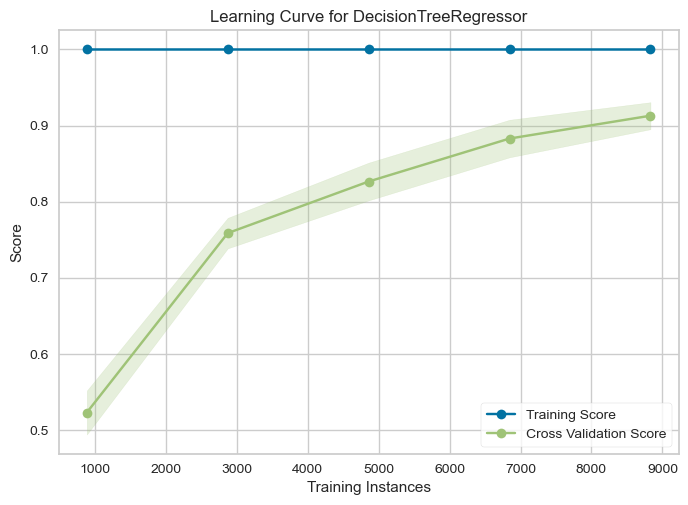

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [61]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Instantiate the regression model and visualizer
visualizer = LearningCurve(tree, scoring='r2')         
visualizer.fit(x_train_scaled, y_train_vel)        # Fit the data to the visualizer
visualizer.show()                                      # Finalize and render the figure


### Tuning Decision Tree

In [55]:
# Hyper parameters range intialization for tuning 

# parameters={
#             "splitter":["best","random"],
#             # "max_depth" : [18,20,100, 200, 400, 500, 600, 700, 1000],
#             "min_samples_leaf":[1],
#             # "max_features":["auto","log2","sqrt", None],
#                 }

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
         #   "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [56]:
from sklearn.model_selection import RandomizedSearchCV

bestTree = RandomizedSearchCV(tree,parameters,scoring='r2',cv=3)
bestTree.fit(x_val_scaled, y_val)
print("")

In [57]:
print("best score:", bestTree.best_score_)
print("best_param:")
bestTree.best_params_

best score: 0.48550109333273533
best_param:


{'splitter': 'best',
 'min_samples_leaf': 9,
 'max_leaf_nodes': 80,
 'max_features': 'auto',
 'max_depth': 12}

#### best Decision Tree Model

In [58]:

# # Prediction
dec_pred_train = bestTree.predict(x_train_scaled)
dec_pred_test = bestTree.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print("Tuned Decision Tree")
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train, dec_pred_train), mean_squared_error(y_test, dec_pred_test)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train, dec_pred_train), r2_score(y_test, dec_pred_test)))

Tuned Decision Tree
MSE train: 0.0403, test: 0.1064
R^2 train: 0.5538, test: -0.3098


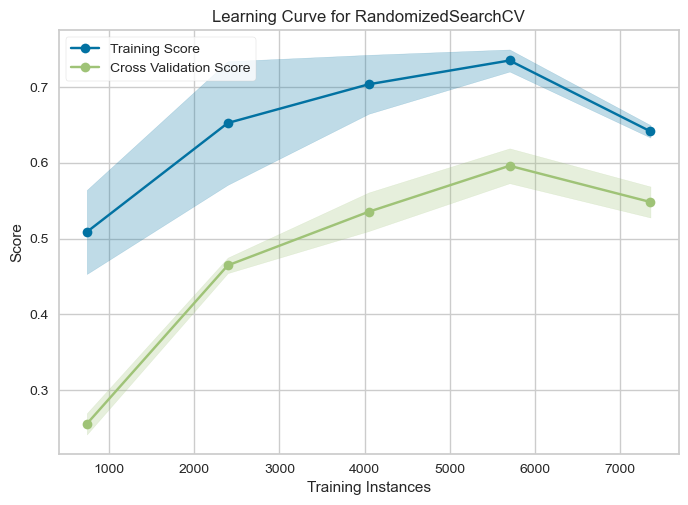

<AxesSubplot:title={'center':'Learning Curve for RandomizedSearchCV'}, xlabel='Training Instances', ylabel='Score'>

In [59]:
# Instantiate the regression model and visualizer
visualizer = LearningCurve(bestTree, scoring='r2')         
visualizer.fit(x_train_scaled, y_train)        # Fit the data to the visualizer
visualizer.show()                                      # Finalize and render the figure

In [60]:

# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []
# max_depths = [20, 50, 100, 300, 500, 700, 1000]

# for max_depth in max_depths:
#    dt = DecisionTreeRegressor(max_depth=max_depth)
#    dt.fit(x_train_scaled, y_train)
#    dt_pred_train = tree.predict(x_train_scaled)
#    train_results.append(r2_score(y_train, dt_pred_train))
   
#    dt.fit(x_test_scaled, y_test)
#    dt_pred_test = tree.predict(x_test_scaled)
#    test_results.append(r2_score(y_test, dt_pred_test))


# from matplotlib.legend_handler import HandlerLine2D
# # line1, = plt.plot(max_depths, train_results, 'b', label= "Train AUC")
# line2, = plt.plot(max_depths, test_results, 'r', label= "Test AUC")
# # plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("R2 score")
# plt.xlabel("Tree depth’")
# plt.show()